## 03-Lab - XGBoost Regression

In this lab, you need to work with Students data and grades as labels for Portugese students. Your task is to fit an XGBoost Regressor, and predict the grades (G3) based on suitable input variables. You are required to do the data manipulation (converting text to numeric), train-test splits, etc to create the model.

This lab has 3 parts. In part 1 you will convert categorical featues to dummy features, In part 2 you will train a XGBoost regressor and compare it to a svr. In the final part, you will find the optimal parameters for the XGBoost random forest regressor and compare the results 

Data is availabe in : https://raw.githubusercontent.com/colaberry/DSin100days/master/data/student-por.csv

Description is available here : https://archive.ics.uci.edu/ml/datasets/Student+Performance#


In [1]:
# Import the library
import pandas as pd

students_por_url = "https://raw.githubusercontent.com/colaberry/DSin100days/master/data/student-por.csv"
students = pd.read_csv(students_por_url,sep=';')
students.head()

#Write your code here or in other code cells down

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Part 1: Converting categorical features to dummy features

In [2]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

data_set = students[['traveltime','studytime','G3', 'age', 'G1', 'G2']]
encoder = OneHotEncoder()


tt_dummy_data = encoder.fit_transform(data_set['traveltime'].values.reshape(-1,1)).toarray()
column_names= ['tt_dummy_'+str(x) for x in range(0,tt_dummy_data.shape[1])]
t_dummy = pd.DataFrame(data=tt_dummy_data, columns=column_names) 
data_set = pd.concat([data_set,t_dummy], axis=1)


st_dummy_data = encoder.fit_transform(data_set['studytime'].values.reshape(-1,1)).toarray()
column_names= ['st_dummy_'+str(x) for x in range(0,st_dummy_data.shape[1])]
s_dummy = pd.DataFrame(data=st_dummy_data, columns=column_names) 
data_set = pd.concat([data_set,s_dummy], axis=1)

data_set_copy = data_set.copy()
data_set_copy = data_set_copy.drop(columns=['traveltime','studytime'])

columns_list = list(data_set.columns)
data_set_copy_shape = data_set_copy.shape
print("columns in the new dataset are {}\n".format(columns_list))
print("shape of the dataset is {}".format(data_set_copy_shape))


columns in the new dataset are ['traveltime', 'studytime', 'G3', 'age', 'G1', 'G2', 'tt_dummy_0', 'tt_dummy_1', 'tt_dummy_2', 'tt_dummy_3', 'st_dummy_0', 'st_dummy_1', 'st_dummy_2', 'st_dummy_3']

shape of the dataset is (649, 12)


columns in the new dataset are ['traveltime', 'studytime', 'G3', 'age', 'G1', 'G2', 'tt_dummy_0', 'tt_dummy_1', 'tt_dummy_2', 'tt_dummy_3', 'st_dummy_0', 'st_dummy_1', 'st_dummy_2', 'st_dummy_3']

shape of the dataset is (649, 12)

In [3]:
from sklearn.model_selection import train_test_split 
y = data_set_copy["G3"]
X = data_set_copy.drop(columns=["G3"]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

training_shape = X_train.shape
print("training data shape {}".format(training_shape))

training data shape (584, 11)


training data shape (584, 11)

training data shape (584, 11)

## Part 2: Training a XGBoost Random forest regressor and comparing it to SVR

In [4]:
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error

xrf_reg = XGBRFRegressor(n_estimators=500, max_depth=500, random_state=5)
xrf_pred = xrf_reg.fit(X_train, y_train).predict(X_test)
mse_xrf = mean_squared_error(xrf_pred, y_test)
print("Mean squared error from training Xgboost Random forest algorithm is {}".format(mse_xrf))

Mean squared error from training Xgboost Random forest algorithm is 2.1229926369583767


Mean squared error from training Xgboost Random forest algorithm is 2.197034125041056

In [5]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr_pred = svr.fit(X_train, y_train).predict(X_test)
mse_svr = mean_squared_error(svr_pred, y_test)
print("Mean squared error from training support vector regressor algorithm is {}".format(mse_svr))

Mean squared error from training support vector regressor algorithm is 2.438191127137287


Mean squared error from training support vector regressor algorithm is 2.438191127137287


Note: These are unoptimized algorithms, as you will see below, when we optimize the RandomForest regressor we will see better results. The same applies to the support vector regressor. 

## Part 3: Find optimal parameters for XGboost Random Forest regressor

In [6]:
# Running the xgboost regressor over multiple depth sizes and estimators

## number of estimators 
estimators_range = [x for x in range(0,1000,50)]
estimators_range[0]= 1 
mse_estimators = {}
for x in estimators_range: 
    xrf_reg = XGBRFRegressor(n_estimators=x, max_depth=100, random_state=12)
    xrf_pred = xrf_reg.fit(X_train, y_train).predict(X_test)
    mse_val = mean_squared_error(xrf_pred, y_test)
    mse_estimators[x] = mse_val
    
print("length of mse_estimators {}".format(len(mse_estimators)))

length of mse_estimators 20


length of mse_estimators 20

In [7]:
def key_from_value(dt, value): 
    key_index = list(dt.values()).index(value)
    return list(dt.keys())[key_index]

min_mse = min(mse_estimators.values())

# getting the key from a value
# this function will give you the first key with the lowest value
# note that there can be many keys with the lowest values. 
# we just care about the first value 
lowest_estimator = key_from_value(mse_estimators, min_mse)
print("The optimal number of trees for training this dataset is {}".format(lowest_estimator))

The optimal number of trees for training this dataset is 1


The optimal number of trees for training this dataset is 700

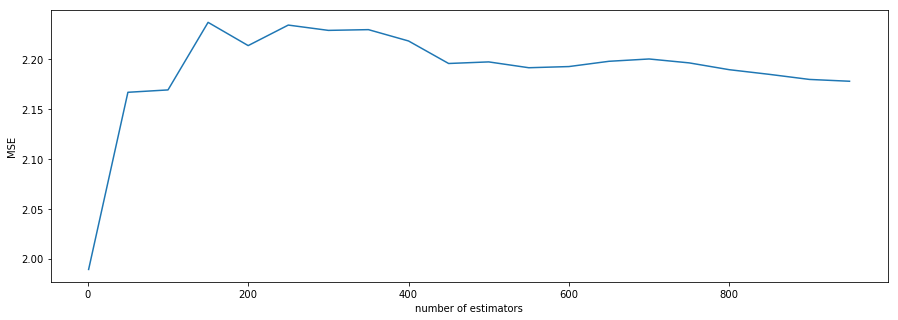

In [8]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
plt.xlabel("number of estimators")
plt.ylabel("MSE")

plt.plot(estimators_range, mse_estimators.values())

In [9]:
# depth size estimation 
depth_range = [x for x in range(0,100,5)]
depth_range[0] = 1
mse_depth = {}
for x in depth_range: 
    xrf_reg = XGBRFRegressor(n_estimators=lowest_estimator, max_depth=x, random_state=12)
    xrf_pred = xrf_reg.fit(X_train, y_train).predict(X_test)
    mse_val = mean_squared_error(xrf_pred, y_test)
    mse_depth[x] = mse_val 
    
print("length of mse_depth {}".format(len(mse_depth)))

length of mse_depth 20


length of mse_depth 20


In [10]:
min_mse = min(mse_depth.values())
lowest_depth = key_from_value(mse_depth, min_mse)
print("The optimal depth for a tree while training this dataset is {}".format(lowest_depth))

The optimal depth for a tree while training this dataset is 5


The optimal depth for a tree while training this dataset is 5

In [11]:
# training with optimal parameters

xrf_reg = XGBRFRegressor(n_estimators=lowest_estimator, max_depth=lowest_depth, random_state=12)
xrf_pred = xrf_reg.fit(X_train, y_train).predict(X_test)
mse_optimized_xrf = mean_squared_error(xrf_pred, y_test)
print("Mean squared error from optimizing both parameters is {} vs {} ".format(mse_optimized_xrf,mse_xrf))

Mean squared error from optimizing both parameters is 1.7299424126497522 vs 2.1229926369583767 


Mean squared error from optimizing both parameters is 1.8466487319574376 vs 2.1689669326031864 
